# 线性回归

0.5482812185435971
0.43606903238180605
0.5356597030142565
0.736263899848181


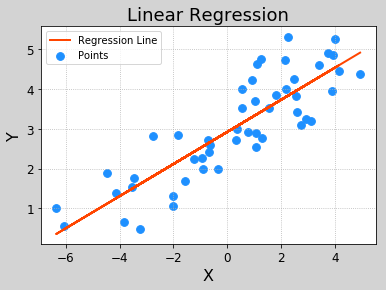

In [2]:
"""
线性回归
"""
import numpy as np
import sklearn.linear_model as lm
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.metrics as sm

x ,y = np.loadtxt('../ml_data/single.txt', 
	delimiter=',', usecols=(0,1), 
	unpack=True)
# 把x改为n行1列  这样才可以作为输入交给模型训练
x = x.reshape(-1, 1)
# 训练模型
model = lm.LinearRegression()
model.fit(x, y)
pred_y = model.predict(x)

# 评估回归模型的误差
# 平均绝对值误差  1/m∑|预测输出-真实输出|
print(sm.mean_absolute_error(y, pred_y))
# 平均平方误差  sqrt(1/m∑(预测输出-真实输出)^2)
print(sm.mean_squared_error(y, pred_y))
# 中位数绝对值误差  median(|预测输出-真实输出|)
print(sm.median_absolute_error(y, pred_y))
# r2得分 (0,1]的一个分值,分数越高,误差越小
print(sm.r2_score(y, pred_y))

mp.figure('Linear Regression', facecolor='lightgray')
mp.title('Linear Regression', fontsize=18)
mp.xlabel('X', fontsize=16)
mp.ylabel('Y', fontsize=16)
mp.tick_params(labelsize=12)
mp.grid(linestyle=':')
mp.scatter(x, y, s=60, c='dodgerblue', 
	label='Points')
mp.plot(x, pred_y, c='orangered', linewidth=2,
	label='Regression Line')
mp.legend()
mp.show()

# KNN算法
## KNN分类

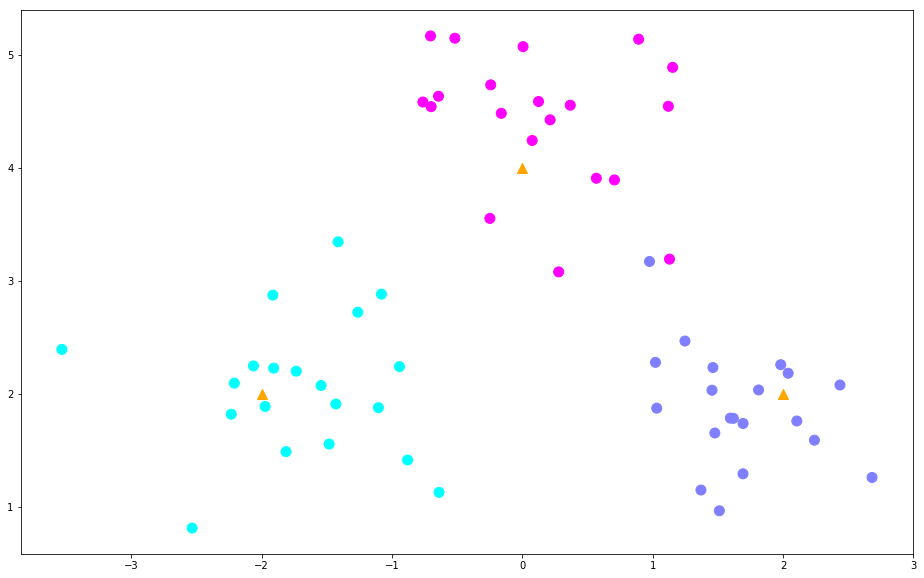

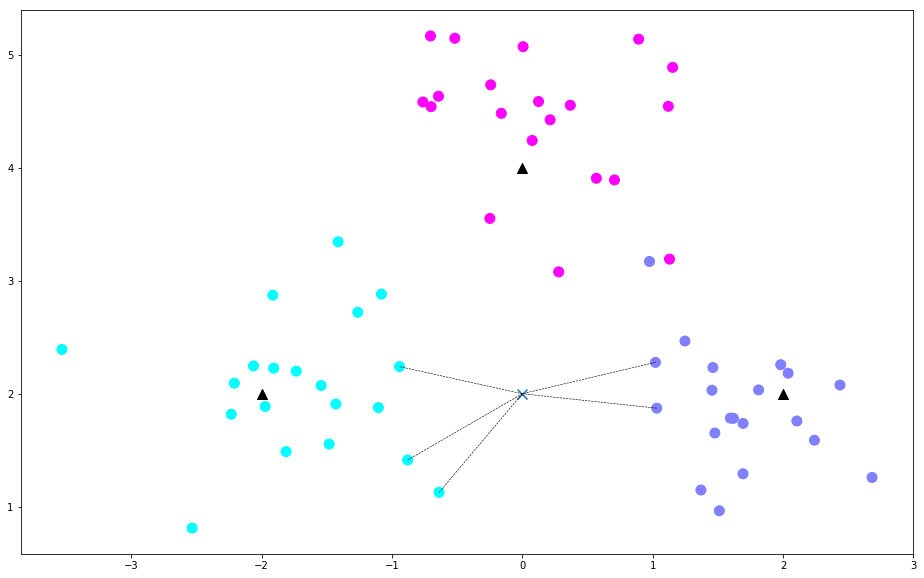

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
# 生成数据
centers = [[-2, 2], [2, 2], [0, 4]]
X, y = make_blobs(n_samples=60, centers=centers, random_state=0, cluster_std=0.60)
# 画出数据
plt.figure(figsize=(16, 10))
c = np.array(centers)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool');         # 画出样本
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='orange');   # 画出中心点
from sklearn.neighbors import KNeighborsClassifier
# 模型训练
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X, y);
# 进行预测
X_sample = [0, 2]
X_sample = np.array(X_sample).reshape(1, -1)
y_sample = clf.predict(X_sample);
neighbors = clf.kneighbors(X_sample, return_distance=False);
# 画出示意图
plt.figure(figsize=(16, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool')    # 样本
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='k')   # 中心点
plt.scatter(X_sample[0][0], X_sample[0][1], marker="x", 
            s=100, cmap='cool')    # 待预测的点

for i in neighbors[0]:
    # 预测点与距离最近的 5 个样本的连线
    plt.plot([X[i][0], X_sample[0][0]], [X[i][1], X_sample[0][1]], 
             'k--', linewidth=0.6);

## KNN回归


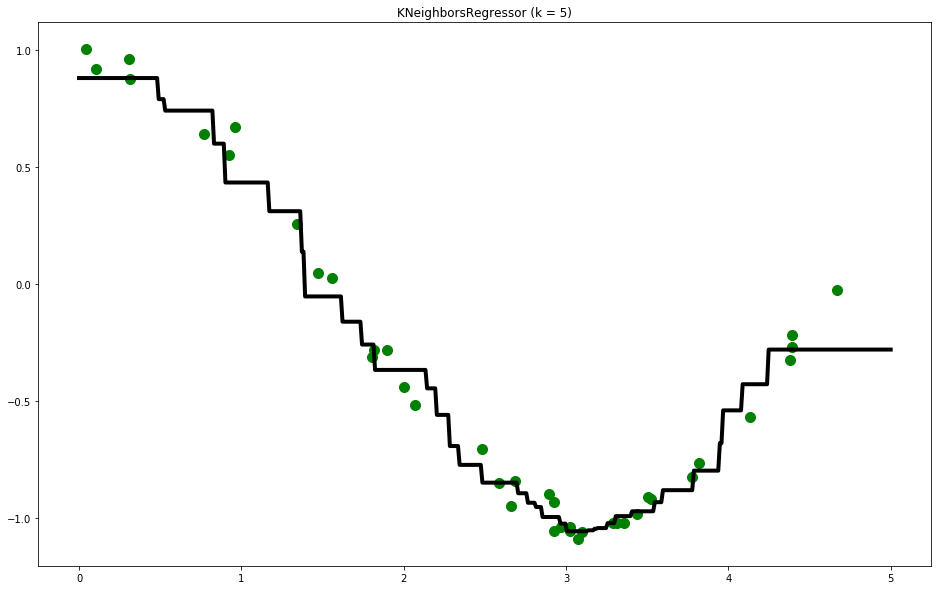

In [2]:
# 训练模型
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
# 生成训练样本
n_dots = 40
X = 5 * np.random.rand(n_dots, 1)
y = np.cos(X).ravel()

# 添加一些噪声
y += 0.2 * np.random.rand(n_dots) - 0.1
k = 5
knn = KNeighborsRegressor(k)
knn.fit(X, y);
# 生成足够密集的点并进行预测
T = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = knn.predict(T)
knn.score(X, y)
# 画出拟合曲线
plt.figure(figsize=(16, 10))
plt.scatter(X, y, c='g', label='data', s=100)         # 画出训练样本
plt.plot(T, y_pred, c='k', label='prediction', lw=4)  # 画出拟合曲线
plt.axis('tight')
plt.title("KNeighborsRegressor (k = %i)" % k)
plt.show()

## 案例（预测）

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 加载数据
data = pd.read_csv('src/diabetes.csv')
print('dataset shape {}'.format(data.shape))
data.head()

dataset shape (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [5]:
X = data.iloc[:, 0:8]
Y = data.iloc[:, 8]
print('shape of X {}; shape of Y {}'.format(X.shape, Y.shape))

shape of X (768, 8); shape of Y (768,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2);

In [7]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

models = []
models.append(("KNN", KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights", KNeighborsClassifier(
    n_neighbors=2, weights="distance")))
models.append(("Radius Neighbors", RadiusNeighborsClassifier(
    n_neighbors=2, radius=500.0)))

In [8]:
results = []
for name, model in models:
    model.fit(X_train, Y_train)
    results.append((name, model.score(X_test, Y_test)))
for i in range(len(results)):
    print("name: {}; score: {}".format(results[i][0],results[i][1]))

name: KNN; score: 0.6688311688311688
name: KNN with weights; score: 0.6623376623376623
name: Radius Neighbors; score: 0.6103896103896104


In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X, Y, cv=kfold)
    results.append((name, cv_result))
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(
        results[i][0],results[i][1].mean()))


name: KNN; cross val score: 0.7147641831852358
name: KNN with weights; cross val score: 0.6770505809979495
name: Radius Neighbors; cross val score: 0.6497265892002735


In [12]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)
print("train score: {}; test score: {}".format(train_score, test_score))

train score: 0.8322475570032574; test score: 0.6688311688311688


In [13]:
from sklearn.model_selection import ShuffleSplit
from common.utils import plot_learning_curve

knn = KNeighborsClassifier(n_neighbors=2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(10, 6))
plot_learning_curve(plt, knn, "Learn Curve for KNN Diabetes", 
                    X, Y, ylim=(0.0, 1.01), cv=cv);

ModuleNotFoundError: No module named 'common'

In [14]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=2)
X_new = selector.fit_transform(X, Y)
X_new[0:5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

In [15]:
results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X_new, Y, cv=kfold)
    results.append((name, cv_result))
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(
        results[i][0],results[i][1].mean()))

name: KNN; cross val score: 0.725205058099795
name: KNN with weights; cross val score: 0.6900375939849623
name: Radius Neighbors; cross val score: 0.6510252904989747


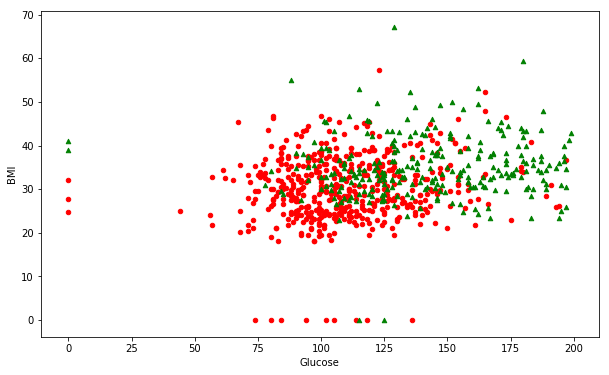

In [16]:
# 画出数据
plt.figure(figsize=(10, 6))
plt.ylabel("BMI")
plt.xlabel("Glucose")
plt.scatter(X_new[Y==0][:, 0], X_new[Y==0][:, 1], c='r', s=20, marker='o');         # 画出样本
plt.scatter(X_new[Y==1][:, 0], X_new[Y==1][:, 1], c='g', s=20, marker='^');         # 画出样本

## 岭回归

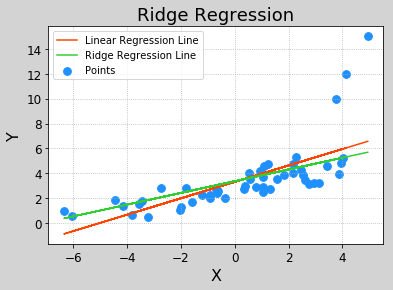

In [18]:
"""
岭回归
"""
import numpy as np
import sklearn.linear_model as lm
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.metrics as sm

x ,y = np.loadtxt('../ml_data/abnormal.txt', 
	delimiter=',', usecols=(0,1), 
	unpack=True)
# 把x改为n行1列  这样才可以作为输入交给模型训练
x = x.reshape(-1, 1)
mp.figure('Ridge Regression', facecolor='lightgray')
mp.title('Ridge Regression', fontsize=18)
mp.xlabel('X', fontsize=16)
mp.ylabel('Y', fontsize=16)
mp.tick_params(labelsize=12)
mp.grid(linestyle=':')
mp.scatter(x, y, s=60, c='dodgerblue', 
	label='Points')

# 使用线性回归, 绘制回归线
model = lm.LinearRegression()
model.fit(x, y)
pred_y = model.predict(x)
mp.plot(x, pred_y, c='orangered', 
		label='Linear Regression Line')

# 使用岭回归, 绘制回归线
model = lm.Ridge(150, fit_intercept=True, 
	    max_iter=1000)
model.fit(x, y)
pred_y = model.predict(x)
mp.plot(x, pred_y, c='limegreen', 
		label='Ridge Regression Line')


mp.legend()
mp.show()

## 多项式回归

0.4818952135901267
0.35240714067500106
0.47265950522390565
0.7868629092058498


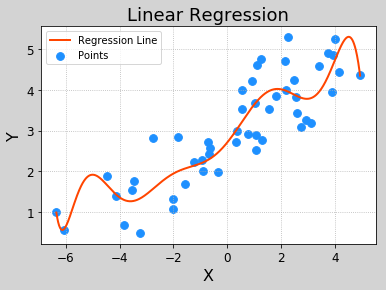

In [19]:
"""
多项式回归
"""
import numpy as np
import sklearn.linear_model as lm
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.metrics as sm
import sklearn.preprocessing as sp
import sklearn.pipeline as pl

x ,y = np.loadtxt('../ml_data/single.txt', 
	delimiter=',', usecols=(0,1), 
	unpack=True)
# 把x改为n行1列  这样才可以作为输入交给模型训练
x = x.reshape(-1, 1)
# 训练多项式回归模型
model = pl.make_pipeline(
	sp.PolynomialFeatures(10), 
	lm.LinearRegression()
)
model.fit(x, y)
pred_y = model.predict(x)
# 为了绘制多项式模型曲线, 构建1000个点
test_x = np.linspace(x.min(), x.max(), 1000)
test_x = test_x.reshape(-1, 1)
pred_test_y = model.predict(test_x)


# 评估回归模型的误差
# 平均绝对值误差  1/m∑|预测输出-真实输出|
print(sm.mean_absolute_error(y, pred_y))
# 平均平方误差  sqrt(1/m∑(预测输出-真实输出)^2)
print(sm.mean_squared_error(y, pred_y))
# 中位数绝对值误差  median(|预测输出-真实输出|)
print(sm.median_absolute_error(y, pred_y))
# r2得分 (0,1]的一个分值,分数越高,误差越小
print(sm.r2_score(y, pred_y))

mp.figure('Linear Regression', facecolor='lightgray')
mp.title('Linear Regression', fontsize=18)
mp.xlabel('X', fontsize=16)
mp.ylabel('Y', fontsize=16)
mp.tick_params(labelsize=12)
mp.grid(linestyle=':')
mp.scatter(x, y, s=60, c='dodgerblue', 
	label='Points')
mp.plot(test_x, pred_test_y, c='orangered', 
	linewidth=2, label='Regression Line')
mp.legend()
mp.show()

## 逻辑回归

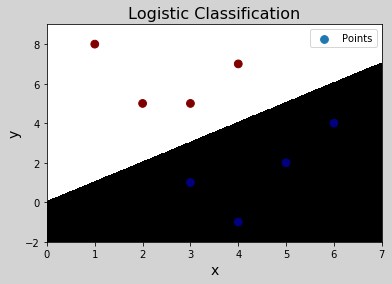

In [20]:
"""
逻辑分类  
"""
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.linear_model as lm

x = np.array([
	[3, 1],
	[2, 5],
	[1, 8],
	[6, 4],
	[5, 2],
	[3, 5],
	[4, 7],
	[4, -1]])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0])
# 把样本绘制出来
mp.figure('Logistic Classification', facecolor='lightgray')
mp.title('Logistic Classification', fontsize=16)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')

# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))

# 构建逻辑分类器
model = lm.LogisticRegression(
	solver='liblinear', C=10)
model.fit(x, y)
# 把grid_x与grid_y抻平了组成模型的输入,预测输出
test_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_test_y = model.predict(test_x)
grid_z = pred_test_y.reshape(grid_x.shape)

mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')

mp.scatter(x[:, 0], x[:, 1], s=60, c=y,
	marker='o', label='Points', cmap='jet')

mp.legend()
mp.show()


## 多元逻辑回归

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


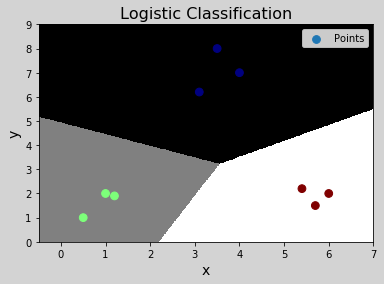

In [24]:
"""
demo06_mlc.py  多元逻辑分类  
"""
import numpy as np
import matplotlib.pyplot as mp
import sklearn.linear_model as lm

x = np.array([
	[4, 7],
	[3.5, 8],
	[3.1, 6.2],
	[0.5, 1],
	[1, 2],
	[1.2, 1.9],
	[6, 2],
	[5.7, 1.5],
	[5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])
# 把样本绘制出来
mp.figure('Logistic Classification', facecolor='lightgray')
mp.title('Logistic Classification', fontsize=16)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')

# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))

# 构建逻辑分类器
model = lm.LogisticRegression(
	solver='liblinear', C=1000)
model.fit(x, y)
# 把grid_x与grid_y抻平了组成模型的输入,预测输出
test_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_test_y = model.predict(test_x)
# for i in pred_test_y:
#     print(i)
# print(pred_test_y)
grid_z = pred_test_y.reshape(grid_x.shape)

mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')

mp.scatter(x[:, 0], x[:, 1], s=60, c=y,
	marker='o', label='Points', cmap='jet')

mp.legend()
mp.show()



## 支持向量分类

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


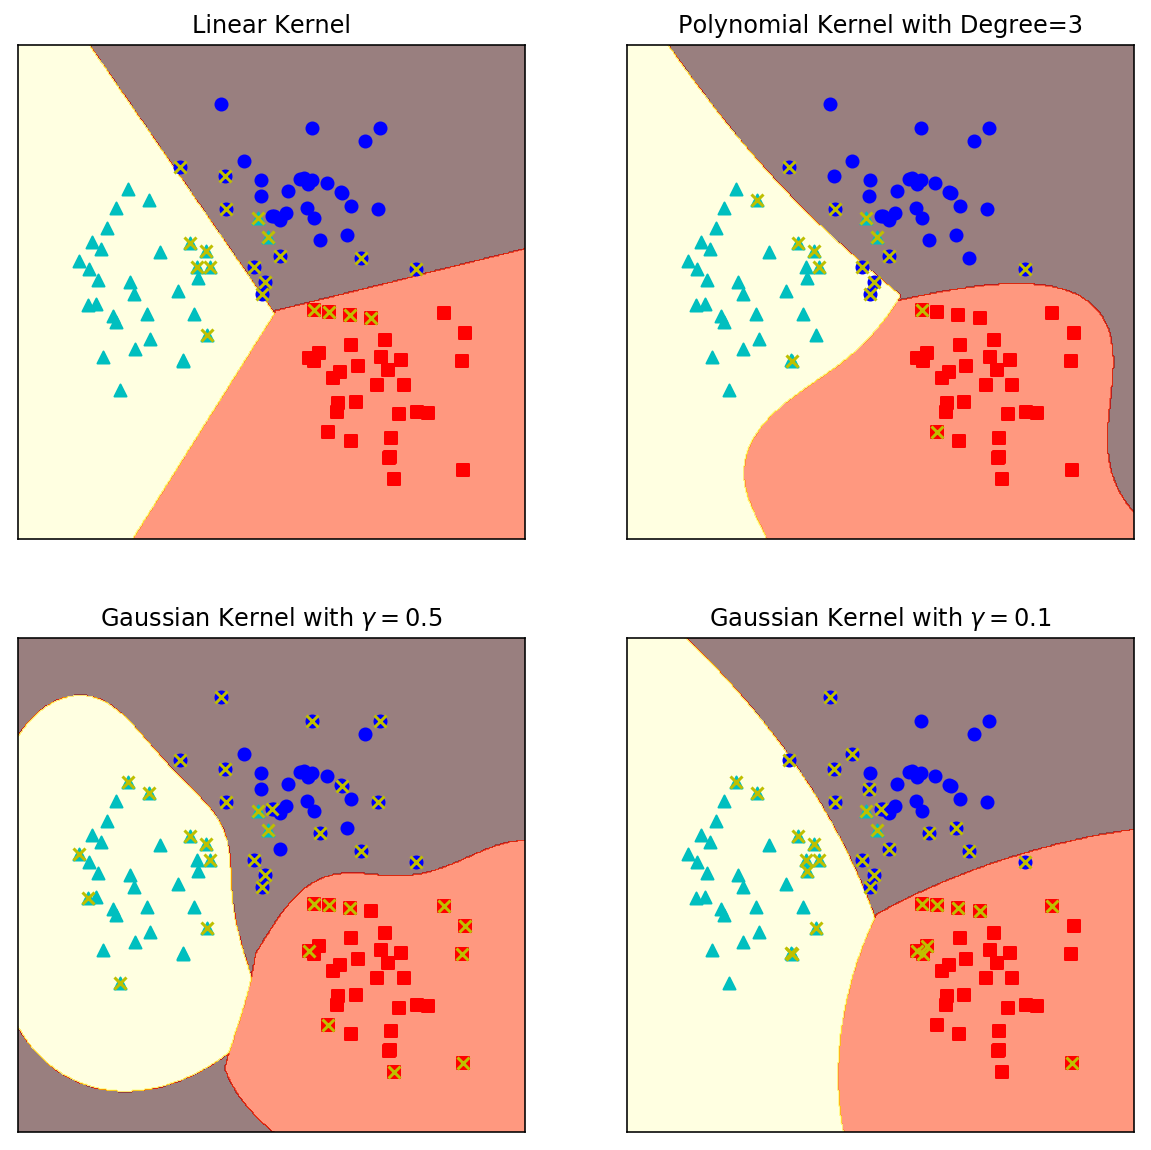

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs
def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

X, y = make_blobs(n_samples=100, centers=3, 
                  random_state=0, cluster_std=0.8)
clf_linear = svm.SVC(C=1.0, kernel='linear')
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)
clf_rbf2 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)

plt.figure(figsize=(10, 10), dpi=144)

clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf2]
titles = ['Linear Kernel', 
          'Polynomial Kernel with Degree=3', 
          'Gaussian Kernel with $\gamma=0.5$', 
          'Gaussian Kernel with $\gamma=0.1$']
for clf, i in zip(clfs, range(len(clfs))):
    clf.fit(X, y)
    plt.subplot(2, 2, i+1)
    plot_hyperplane(clf, X, y, title=titles[i])

## 支持向量回归

In [4]:
"""
支持向量机
"""
import numpy as np
import sklearn.preprocessing as sp
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm

class DigitEncoder():

    def fit_transform(self, y):
        return y.astype(int)

    def transform(self, y):
    	return y.astype(int)

    def inverse_transform(self, y):
    	return y.astype(str)

data = np.loadtxt('../ml_data/traffic.txt', 
	delimiter=',', dtype='U20')
data = data.T
encoders, x = [], []
for row in range(len(data)):
	if data[row][0].isdigit():
		encoder = DigitEncoder()
	else:
		encoder = sp.LabelEncoder()
	encoders.append(encoder)
	# 整理输入集
	if row < len(data)-1:
		x.append(
			encoder.fit_transform(data[row]))
	else:
		y = encoder.fit_transform(data[row])
# 整理数据集
x = np.array(x).T
# 拆分测试集 训练集 
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.25, 
	random_state=7)
# 创建模型, 模型训练
model = svm.SVR(kernel='rbf', C=10)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))

# 结果预测
data=[['Tuesday','13:35','San Francisco','yes']]
data = np.array(data).T

x = []
for row in range(len(data)):
	encoder = encoders[row]
	x.append(encoder.transform(data[row]))
x = np.array(x).T
pred_y = model.predict(x)
print(int(pred_y))

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6478692163198654
22


## 决策树回归

In [1]:
"""
demo07_house.py  预测房屋价格
"""
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.tree as st
import sklearn.metrics as sm


# 读取数据  加载波士顿房屋价格
boston = sd.load_boston()
print(boston.data.shape)	# 数据的维度
print(boston.feature_names) # 数据的特征名
print(boston.target.shape)

# 划分测试集与训练集
# 打乱数据集 
# 以random_state随机种子作为参数生成数据集
x, y=su.shuffle(boston.data, boston.target, 
				random_state=7)
train_size = int(len(x)*0.8)
train_x, test_x, train_y, test_y = \
    x[:train_size], x[train_size:], \
    y[:train_size], y[train_size:]

# 创建决策树回归器模型,使用训练集训练模型, 
# 测试集测试模型
model=st.DecisionTreeRegressor(max_depth=6)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))


(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506,)
0.8407507213504029


## 决策树分类

In [2]:
"""
预测小汽车的等级
"""
import numpy as np
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.model_selection as ms

data = np.loadtxt('../ml_data/car.txt', 
	dtype='U20', delimiter=',')
data = data.T
encoders = []
train_x, train_y = [], []
for row in range(len(data)):
	# 创建适用于当前特征的标签编码器
	encoder = sp.LabelEncoder()
	if row < len(data)-1:
		train_x.append(
			encoder.fit_transform(data[row]))
	else:
		train_y = \
			encoder.fit_transform(data[row])
	encoders.append(encoder)
train_x = np.array(train_x).T

# 模型训练
model = se.RandomForestClassifier(max_depth=6, 
	n_estimators=200, random_state=7)
# 交叉验证
print(train_x.shape, train_y.shape)
score = ms.cross_val_score(model, train_x, 
	train_y, cv=4, scoring='f1_weighted')
print(score.mean())
model.fit(train_x, train_y)

# 自定义测试集  进行预测
data = [
['high','med','5more','4','big','low','unacc'],
['high','high','4','4','med','med','acc'],
['low','low','2','4','small','high','good'],
['low','med','3','4','med','high','vgood']]
# 训练时如何做的标签编码, 测试时需要使用相同的
# 标签编码器进行编码
data = np.array(data).T
test_x, test_y = [], []
for row in range(len(data)):
	encoder = encoders[row] # 得到标签编码器
	if row < len(data)-1:
		test_x.append(
			encoder.transform(data[row]))
	else:
		test_y = encoder.transform(data[row])
test_x = np.array(test_x).T
pred_test_y = model.predict(test_x)
enc = encoders[-1]
print(enc.inverse_transform(test_y))
print(enc.inverse_transform(pred_test_y))

(1728, 6) (1728,)


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7465877061619401
['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'acc' 'vgood']


### 正向激励（可以用来评估特征的重要性）

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506,)
0.9068598725149652
[0.03339581 0.00287794 0.00810414 0.00099482 0.0463733  0.27796803
 0.00884059 0.11267449 0.02459319 0.05455562 0.05567394 0.0194009
 0.35454723]
0.8202560889408634


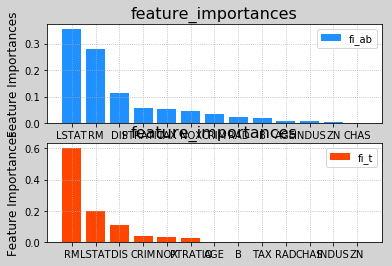

In [4]:
"""
demo01_adaboost.py  正向激励
"""
%matplotlib inline
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.metrics as sm
import matplotlib.pyplot as mp
import numpy as np

# 读取数据  加载波士顿房屋价格
boston = sd.load_boston()
print(boston.data.shape)	# 数据的维度
print(boston.feature_names) # 数据的特征名
print(boston.target.shape)

# 划分测试集与训练集
# 打乱数据集 
# 以random_state随机种子作为参数生成数据集
x, y=su.shuffle(boston.data, boston.target, 
				random_state=7)
train_size = int(len(x)*0.8)
train_x, test_x, train_y, test_y = \
    x[:train_size], x[train_size:], \
    y[:train_size], y[train_size:]

# 创建决策树回归器模型,使用训练集训练模型, 
# 测试集测试模型
t_model=st.DecisionTreeRegressor(max_depth=4)
# 基于正向激励  搞出多颗树
model = se.AdaBoostRegressor(t_model, 
	n_estimators=400, random_state=7)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
fi_ab = model.feature_importances_
print(fi_ab)

# 使用决策树训练模型
model=st.DecisionTreeRegressor(max_depth=4)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
fi_t = model.feature_importances_


# 绘制特征重要性柱状图
mp.figure('feature_importances',facecolor='lightgray')
mp.subplot(211)
mp.title('feature_importances',fontsize=16)
mp.ylabel('Feature Importances', fontsize=12)
mp.grid(linestyle=':')
sorted_indices = fi_ab.argsort()[::-1]
x = np.arange(fi_ab.size)
mp.xticks(x, boston.feature_names[sorted_indices])
mp.bar(x, fi_ab[sorted_indices], 
	color='dodgerblue', label='fi_ab')
mp.legend()

mp.subplot(212)
mp.title('feature_importances',fontsize=16)
mp.ylabel('Feature Importances', fontsize=12)
mp.grid(linestyle=':')
sorted_indices = fi_t.argsort()[::-1]
x = np.arange(fi_t.size)
mp.xticks(x, boston.feature_names[sorted_indices])
mp.bar(x, fi_t[sorted_indices], 
	color='orangered', label='fi_t')
mp.legend()

mp.show()

## 随机森林

0.8942876829862128
[0.06634649 0.29098831 0.02830764 0.00328082 0.01440728 0.00402171
 0.01813841 0.32664051 0.15405743 0.06262934 0.03118204]
['season' 'yr' 'mnth' 'holiday' 'weekday' 'workingday' 'weathersit' 'temp'
 'atemp' 'hum' 'windspeed']
0.9186751545910461
[0.02215508 0.08664495 0.00842837 0.64564001 0.00141726 0.00693028
 0.05997982 0.01654412 0.1201541  0.01342932 0.0160527  0.002624  ]
['season' 'yr' 'mnth' 'hr' 'holiday' 'weekday' 'workingday' 'weathersit'
 'temp' 'atemp' 'hum' 'windspeed']


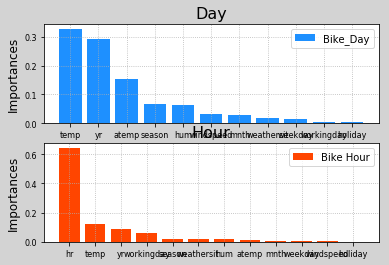

In [5]:
"""
共享单车案例   随机森林
"""
import numpy as np
import sklearn.utils as su
import sklearn.ensemble as se
import sklearn.metrics as sm
import matplotlib.pyplot as mp

data = np.loadtxt('../ml_data/bike_day.csv', 
	delimiter=',', unpack=False, 
	dtype='U20')
# 获取输入集与输出集
header = data[0, 2:13]
x = np.array(data[1:, 2:13], dtype=float)
y = np.array(data[1:, -1], dtype=float)
# 打乱数据集
x, y = su.shuffle(x, y, random_state=7)
# 拆分训练集,测试集
train_size = int(len(x)*0.9)
train_x, test_x, train_y, test_y = \
	x[:train_size], x[train_size:], \
	y[:train_size], y[train_size:]
# 随机森林模型训练
model=se.RandomForestRegressor(max_depth=10, 
	n_estimators=1000, min_samples_split=2)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
# 使用r2得分验证预测结果
print(sm.r2_score(test_y, pred_test_y))
# 输出特征重要性
fi_day = model.feature_importances_
print(fi_day)
print(header)

# 绘制特征重要性柱状图
mp.figure('Bike', facecolor='lightgray')
mp.subplot(211)
mp.title('Day', fontsize=16)
mp.ylabel('Importances', fontsize=12)
mp.tick_params(labelsize=8)
mp.grid(linestyle=':')
pos = np.arange(fi_day.size)
sorted_i = fi_day.argsort()[::-1]
mp.xticks(pos, header[sorted_i])
mp.bar(pos, fi_day[sorted_i], 
	   color='dodgerblue', label='Bike_Day')
mp.legend()


data = np.loadtxt('../ml_data/bike_hour.csv', 
	delimiter=',', unpack=False, 
	dtype='U20')
# 获取输入集与输出集
header = data[0, 2:14]
x = np.array(data[1:, 2:14], dtype=float)
y = np.array(data[1:, -1], dtype=float)
# 打乱数据集
x, y = su.shuffle(x, y, random_state=7)
# 拆分训练集,测试集
train_size = int(len(x)*0.9)
train_x, test_x, train_y, test_y = \
	x[:train_size], x[train_size:], \
	y[:train_size], y[train_size:]
# 随机森林模型训练
model=se.RandomForestRegressor(max_depth=10, 
	n_estimators=1000, min_samples_split=2)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
# 使用r2得分验证预测结果
print(sm.r2_score(test_y, pred_test_y))
# 输出特征重要性
fi_hour = model.feature_importances_
print(fi_hour)
print(header)

mp.subplot(212)
mp.title('Hour', fontsize=16)
mp.ylabel('Importances', fontsize=12)
mp.tick_params(labelsize=8)
mp.grid(linestyle=':')
pos = np.arange(fi_hour.size)
sorted_i = fi_hour.argsort()[::-1]
mp.xticks(pos, header[sorted_i])
mp.bar(pos, fi_hour[sorted_i], 
	   color='orangered', label='Bike Hour')
mp.legend()
mp.show()


# 聚类分析的常见算法

### 一KMeans聚类

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


(262144,)
(2,) [ 58.846287 194.97665 ]


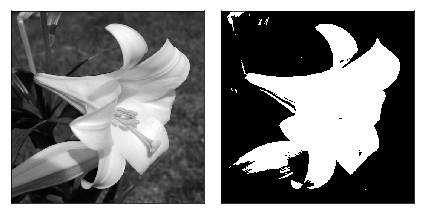

In [2]:
"""
图像量化  KMeans聚类
"""
import numpy as np
import scipy.misc as sm
import scipy.ndimage as sn
import sklearn.cluster as sc
%matplotlib inline
import matplotlib.pyplot as mp

img = sm.imread('../ml_data/lily.jpg', True)
# 图像量化
x = img.reshape(-1, 1)
model = sc.KMeans(n_clusters=2)
model.fit(x)
y = model.labels_
print(y.shape)
# 把每个亮度值修改为相应的聚类中心值
centers = model.cluster_centers_.ravel()
print(centers.shape, centers)
# 使用numpy的掩码操作 修改y数组的每个值
result = centers[y].reshape(img.shape)
mp.figure('Image')
mp.subplot(121)
mp.xticks([])
mp.yticks([])
mp.imshow(img, cmap='gray')
mp.subplot(122)
mp.xticks([])
mp.yticks([])
mp.imshow(result, cmap='gray')
mp.tight_layout()
mp.show()




#### 均值漂移算法

首先嘉定样本空间中的每个聚类均服从某种已知的概率分布规则, 然后用不同的概率密度函数拟合样本中的统计直方图, 不断移动密度函数的中心位置, 直到获得最佳拟合效果为止.这些概率密度函数的峰值点就是聚类的中心, 再根据每个样本距离各个中心的距离, 选择最近的聚类中心所属的类别作为该样本的类别.

均值漂移算法的特点:

1. 聚类数不必事先已知, 算法会自动识别出统计直方图的中心数量.
2. 聚类中心不依据于最初假定, 聚类划分的结果相对稳定.
3. 样本空间应该服从某种概率分布规则, 某则算法的准确性将会大打折扣.

均值漂移相关的API:

```python
# x: 输入 n_samples: 样本数量
# quantile: 量化宽度 (直方图一条的宽度)
bw = sc.estimate_bandwidth(
    x, n_samples=len(x), quantile=0.1)
# 构建均值漂移模型
model = sc.MeanShift(bandwidth=bw)
```

[[3.07897959 5.15326531]
 [6.9823913  5.59804348]
 [5.868      2.21622222]
 [1.97733333 2.00644444]]


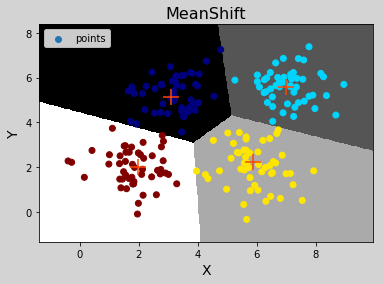

In [3]:
"""
均值漂移
"""
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp

x = np.loadtxt('../ml_data/multiple3.txt', 
	delimiter=',')

# 均值漂移实现聚类划分

bw = sc.estimate_bandwidth(
	x, n_samples=len(x), quantile=0.2)
model = sc.MeanShift(bandwidth=bw)

model.fit(x)
centers = model.cluster_centers_
print(centers)
pred_y = model.predict(x)
# 划分聚类边界
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
mesh_x = np.column_stack((grid_x.ravel(), 
	grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

mp.figure('MeanShift', facecolor='lightgray')
mp.title('MeanShift', fontsize=16)
mp.xlabel('X',fontsize=14)
mp.ylabel('Y',fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(x[:,0], x[:,1], c=pred_y, cmap='jet',
		label='points')
# 绘制聚类中心点
mp.scatter(centers[:,0], centers[:,1],
	marker='+', s=230, c='orangered')
mp.legend()
mp.show()

#### 凝聚层次算法

首先假定每个样本都是一个独立的聚类, 如果统计出来的聚类数大于期望的聚类数, 则从每个样本出发, 寻找离自己最近的另外一个样本, 与之聚集, 形成更大的聚类. 同时另总聚类数减少, 不断重复以上过程, 直到统计出来的聚类总数达到期望值为止.

凝聚层次算法的特点:

1. 凝聚数量必须事先已知. 可以借助于某些指标, 优选参数.
2. 没有聚类中心的概念, 因此只能在训练集中划分聚类, 但不能对训练集以外的未知样本确定其归属.
3. 在确定被凝聚样本时, 除了以距离作为条件以外, 还可以根据连续性来确定被聚集的样本.

凝聚层次相关API:

```python
# 构建凝聚层次聚类模型
model = sc.AgglomerativeClustering(
        n_clusters=4)
pred_y = model.fit_predict(x)
```

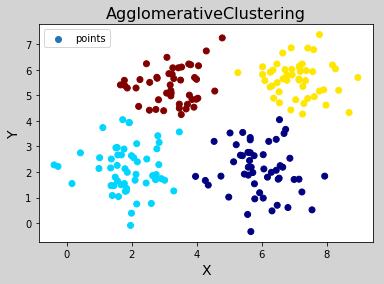

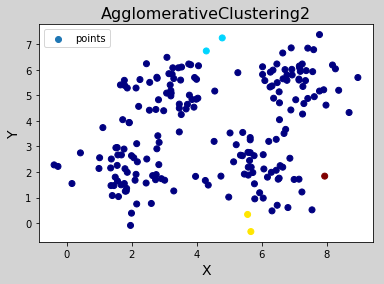

In [4]:
"""
凝聚层次算法
"""
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp
import sklearn.neighbors as nb

x = np.loadtxt('../ml_data/multiple3.txt', 
	delimiter=',')

# 凝聚层次实现聚类划分
model = sc.AgglomerativeClustering(
			n_clusters=4)
pred_y = model.fit_predict(x)

mp.figure('AgglomerativeClustering', facecolor='lightgray')
mp.title('AgglomerativeClustering', fontsize=16)
mp.xlabel('X',fontsize=14)
mp.ylabel('Y',fontsize=14)
mp.tick_params(labelsize=10)
mp.scatter(x[:,0], x[:,1], c=pred_y, cmap='jet',
		label='points')
mp.legend()


# 凝聚层次实现聚类划分 以连续性为条件
# 近邻筛选器
conn = nb.kneighbors_graph(
	   x, 10, include_self=False)
model = sc.AgglomerativeClustering(
			linkage='average',
			n_clusters=4, connectivity=conn)
pred_y = model.fit_predict(x)

mp.figure('AgglomerativeClustering2', facecolor='lightgray')
mp.title('AgglomerativeClustering2', fontsize=16)
mp.xlabel('X',fontsize=14)
mp.ylabel('Y',fontsize=14)
mp.tick_params(labelsize=10)
mp.scatter(x[:,0], x[:,1], c=pred_y, cmap='jet',
		label='points')
mp.legend()


mp.show()


### 评估聚类模型的标准－－－轮廓系数

轮廓系数用于评估一个聚类模型的性能. 一个好的聚类: 内密外疏. 同一个聚类内部的样本要足够密集, 不同聚类之间的样本要足够稀疏.

轮廓系数的计算规则: 针对样本空间中的一个特定样本, 计算它与所在聚类其它样本的平均距离a, 以及该样本与距离最近的另一个聚类中所有的样本的平均距离b. 那么该样本的轮廓系数为(b-a)/max(a,b).   若将整个样本空间中所有样本的轮廓系数取算数平均值, 就可以把该结果作为聚类划分的指标.

该公式结果处于:[-1, 1].  -1代表分类效果比较差, 1代表分类效果好. 0代表聚类重叠, 没有很好的划分聚类.

[[5.91196078 2.04980392]
 [1.831      1.9998    ]
 [7.07326531 5.61061224]
 [3.1428     5.2616    ]]
得分: 0.5773232071896658


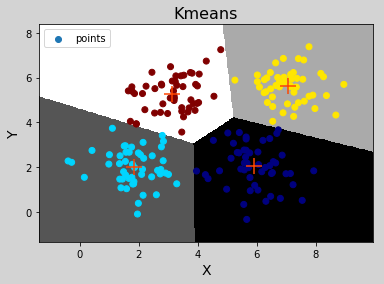

In [5]:
"""

轮廓系数
"""
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp
import sklearn.metrics as sm

x = np.loadtxt('../ml_data/multiple3.txt', 
	delimiter=',')
# KMeans聚类
model = sc.KMeans(n_clusters=4)
model.fit(x)
centers = model.cluster_centers_
print(centers)
pred_y = model.predict(x)
# 输出轮廓系数
score = sm.silhouette_score(x, pred_y, 
	sample_size=len(x), metric='euclidean')
print('得分:',score)

# 划分聚类边界
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
mesh_x = np.column_stack((grid_x.ravel(), 
	grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

mp.figure('Kmeans', facecolor='lightgray')
mp.title('Kmeans', fontsize=16)
mp.xlabel('X',fontsize=14)
mp.ylabel('Y',fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(x[:,0], x[:,1], c=pred_y, cmap='jet',
		label='points')
# 绘制聚类中心点
mp.scatter(centers[:,0], centers[:,1],
	marker='+', s=230, c='orangered')
mp.legend()
mp.show()

#### DBSCAN算法

从样本空间中任意选择一个样本, 以事先给定的半径做圆. 凡是被该圆圈中的样本都视为与该样本处于同样的聚类. 以这些被圈中样本为圆心继续做圆.不断的扩大被圈中样本的规模, 直到没有新的样本加入为止, 由此得到一个聚类. 

在剩余样本中重复以上过程,直到耗尽样本空间中所有的样本为止.

DBSCAN算法的特点:

1. 实现给定的半径会影响最后的聚类效果, 可以根据轮廓系数选择较优的方案.

2. 根据聚类的形成过程, DBSCAN算法支持把样本分为3类:

   **外周样本:** 被其他样本聚集到某个聚类中, 但无法引入新样本的样本.

   **孤立样本:** 聚类中样本数低于所设置的下限, 则不称其为聚类, 反之称为孤立样本.

   **核心样本:** 除了外周样本和孤立样本外的其他样本.

```python
# 构建DBSCAN聚类模型
# eps: 半径
# min_samples: 最小样本数,若低于该值,则为孤立样本
model = sc.DBSCAN(eps=1, min_samples=5)
model.fit(x)
# 获取核心样本的索引
core_indices=best_model.core_sample_indices_
```

0.7999999999999999
0.6366395861050828


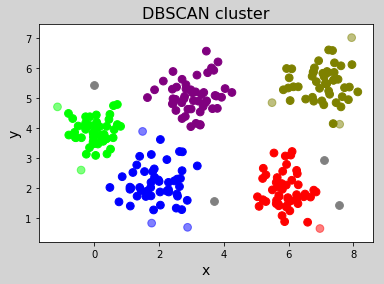

In [6]:
"""
dbscan算法
"""
import numpy as np
import sklearn.cluster as sc
import sklearn.metrics as sm
import matplotlib.pyplot as mp

x = np.loadtxt('../ml_data/perf.txt', 
		       delimiter=',')

# 准备训练模型相关数据
epsilons, scores, models = \
	np.linspace(0.3, 1.2, 10), [], []
# 遍历所有的半径, 训练模型, 查看得分
for epsilon in epsilons:
	model=sc.DBSCAN(eps=epsilon,min_samples=5)
	model.fit(x)
	score=sm.silhouette_score(x, model.labels_, 
		sample_size=len(x), metric='euclidean')
	scores.append(score)
	models.append(model)
# 转成ndarray数组
scores = np.array(scores)
best_i = scores.argmax() # 最优分数的索引
best_eps = epsilons[best_i]
best_sco = scores[best_i]
print(best_eps)
print(best_sco)
# 获取最优模型
best_model = models[best_i]

# 对输入x进行预测得到预测类别
pred_y = best_model.fit_predict(x)

# 获取孤立样本, 外周样本, 核心样本
core_mask = np.zeros(len(x), dtype=bool)
# 获取核心样本的索引, 把对应位置的元素改为True
core_mask[best_model.core_sample_indices_]=True
# 孤立样本的类别标签为-1
offset_mask = best_model.labels_ == -1
# 外周样本掩码 (不是核心也不是孤立样本)
p_mask = ~(core_mask | offset_mask)

# 绘制这些样本数据
mp.figure('DBSCAN cluster', facecolor='lightgray')
mp.title('DBSCAN cluster', fontsize=16)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
# 绘制核心样本
mp.scatter(x[core_mask][:,0], x[core_mask][:,1],
	s=60, cmap='brg', c=pred_y[core_mask])
# 绘制外周样本
mp.scatter(x[p_mask][:,0], x[p_mask][:,1],
	s=60, cmap='brg', c=pred_y[p_mask], 
	alpha=0.5)
# 绘制孤立样本
mp.scatter(x[offset_mask][:,0], 
	x[offset_mask][:,1], s=60, c='gray')

mp.show()

# 降维算法

### PCA

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
A = np.array([[3, 2000], 
              [2, 3000], 
              [4, 5000], 
              [5, 8000], 
              [1, 2000]], dtype='float')

# 数据归一化
mean = np.mean(A, axis=0)
norm = A - mean
# 数据缩放
scope = np.max(norm, axis=0) - np.min(norm, axis=0)
norm = norm / scope
U, S, V = np.linalg.svd(np.dot(norm.T, norm))
U_reduce = U[:, 0].reshape(2,1)
R = np.dot(norm, U_reduce)
Z = np.dot(R, U_reduce.T)
np.multiply(Z, scope) + mean

array([[2.33563616e+00, 2.91695452e+03],
       [2.20934082e+00, 2.71106794e+03],
       [3.79065918e+00, 5.28893206e+03],
       [5.24568220e+00, 7.66090960e+03],
       [1.41868164e+00, 1.42213588e+03]])

In [9]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

def std_PCA(**argv):
    scaler = MinMaxScaler()
    pca = PCA(**argv)
    pipeline = Pipeline([('scaler', scaler),
                         ('pca', pca)])
    return pipeline
# 降维度的核心api
pca = std_PCA(n_components=1)
R2 = pca.fit_transform(A)
R2
pca.inverse_transform(R2)

array([[2.33563616e+00, 2.91695452e+03],
       [2.20934082e+00, 2.71106794e+03],
       [3.79065918e+00, 5.28893206e+03],
       [5.24568220e+00, 7.66090960e+03],
       [1.41868164e+00, 1.42213588e+03]])